# 4th

# 개요  
DF와 S는 이제 익숙해 졌습니다.  
이제 본격적으로 pandas를 이용해 데이터를 분석해보도록 하죠.  

# 데이터 분석 순서  

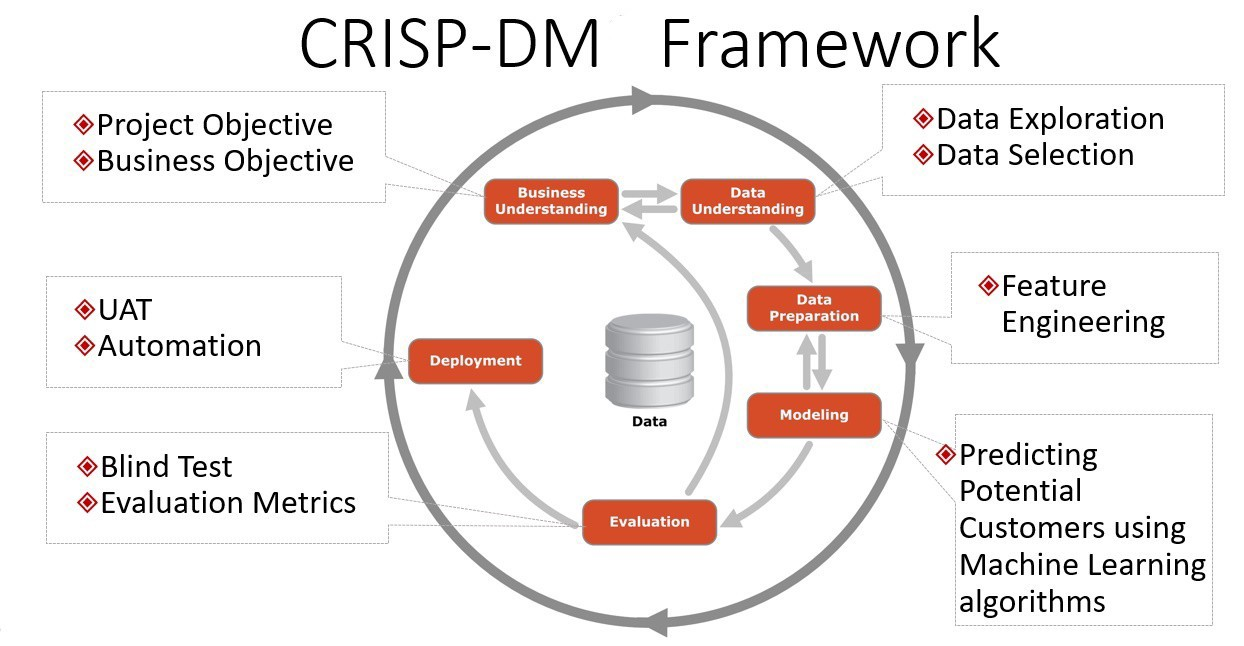

데이터 분석에는 일정한 순서가 있습니다. 위의 그림은 CRISP-DM(Cross Industry Standard Process for Data Mining)이라는 데이터 분석의 일반적인 방법을 체계화한 것입니다. 위의 방법을 참고하여 나만의 데이터 분석을 만들어 봅시다. 

# 2. EDA와 메타 데이터   
탐색적 데이터 분석(EDA, Exploratory Data Analysis)는 데이터를 만나면 가장 먼저 하는 일로, 데이터의 특성을 정리 및 요약하고 시각화하는 과정입니다.  

메타 데이터는 데이터에 대한 데이터를 의미하죠. 행/열의 수, 열의 이름, 각 열의 데이터 타입, 수집일 등의 데이터가 포함되는 것입니다.  
따라서 이런 정보를 DF에서 어떻게 추출하는지 배웠구요.

In [161]:
import pandas as pd
import numpy as np

In [162]:
college=pd.read_csv('data/college.csv')
college.sample(10,random_state=42)

#.head() 라고 쓰는것도 좋을듯 하군요.

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3649,Career Point College,San Antonio,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.9172,0.9172,0.6970,20700,14977
1600,Ner Israel Rabbinical College,Baltimore,MD,0.0,1.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0721,0.0000,0.0000,1,0.2382,0.0000,0.0882,PrivacySuppressed,PrivacySuppressed
6742,Reflections Academy of Beauty,Decatur,IL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.8621,0.5862,0.3333,NaN,PrivacySuppressed
1467,Capital Area Technical College,Baton Rouge,LA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0053,0.0006,0.1926,0.5673,1,0.2502,0.0000,0.4815,26400,PrivacySuppressed
4053,West Virginia University Institute of Technology,Montgomery,WV,0.0,0.0,0.0,0,465.0,500.0,0.0,...,0.0287,0.0762,0.0170,0.1229,1,0.4092,0.5237,0.2381,43400,23969
4087,Mid-State Technical College,Wisconsin Rapids,WI,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0190,0.0000,0.0178,0.6045,1,0.4657,0.4461,0.4819,32000,8025
7495,Strayer University-Huntsville Campus,Huntsville,AL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
4587,National Aviation Academy of Tampa Bay,Clearwater,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0198,0.0198,0.0017,0.0000,1,0.6983,0.7296,0.5376,45000,22778
251,University of California-Santa Cruz,Santa Cruz,CA,0.0,0.0,0.0,0,550.0,580.0,0.0,...,0.0740,0.0216,0.0160,0.0278,1,0.4598,0.5458,0.0447,43000,19884
1426,Lexington Theological Seminary,Lexington,KY,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


In [163]:
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


행과 열의 수는 shape를 통해 알 수 있었죠.

In [164]:
college.shape

(7535, 27)

info를 통하여 더 많은 정보를 얻을 수 있었습니다.

In [165]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INSTNM              7535 non-null   object 
 1   CITY                7535 non-null   object 
 2   STABBR              7535 non-null   object 
 3   HBCU                7164 non-null   float64
 4   MENONLY             7164 non-null   float64
 5   WOMENONLY           7164 non-null   float64
 6   RELAFFIL            7535 non-null   int64  
 7   SATVRMID            1185 non-null   float64
 8   SATMTMID            1196 non-null   float64
 9   DISTANCEONLY        7164 non-null   float64
 10  UGDS                6874 non-null   float64
 11  UGDS_WHITE          6874 non-null   float64
 12  UGDS_BLACK          6874 non-null   float64
 13  UGDS_HISP           6874 non-null   float64
 14  UGDS_ASIAN          6874 non-null   float64
 15  UGDS_AIAN           6874 non-null   float64
 16  UGDS_N

기술 통계량을 구하는 함수가 뭐였죠? .describe()  
T를 구하는 이유는 데이터를 보기 어려운 경우가 있을때 행과 열을 바꾸어 보기위해 사용하였었죠.

In [166]:
college.describe().T

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000


문자열(object)에 대한 통계는 include를 사용하는거 아시죠?

In [167]:
college.describe(include=['object'])

,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
count,7535,7535,7535,6413,7503
unique,7535,2514,59,598,2038
top,Shasta School of Cosmetology,New York,CA,PrivacySuppressed,PrivacySuppressed
freq,1,87,773,822,1510


Describe는 기본적으로 수치형에 대해 사분위(25,50,75)를 보여주지만 이를 통해 내가 원하는 것으로 바꿀 수도 있습니다.  
추가적인 퍼센테이지도 볼 수 있죠. 

In [168]:
college.describe(include=[np.number],percentiles=[
    .01,
    .05,
    .10,
    .25,
    .5,
    .75,
    .9,
    .95,
    .99,
]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.00000,1.000000,1.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,390.000000,430.000000,447.40000,475.000000,510.00000,555.000000,605.00000,665.000000,730.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,395.000000,430.000000,453.00000,482.000000,520.00000,565.000000,630.00000,685.000000,745.250000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,14.000000,31.650000,49.00000,117.000000,412.50000,1929.500000,6512.30000,11858.050000,26015.290000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.000000,0.013265,0.06879,0.267500,0.55570,0.747875,0.86297,0.927315,1.000000,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.000000,0.000000,0.00753,0.036125,0.10005,0.257700,0.51571,0.726715,0.961467,1.0000


# 데이터 딕셔너리 (data dictionary) 
데이터 딕셔너리는 말 그대로 사전식으로, 데이터 이름과 데이터의 뜻을 설명하는 것을 말합니다. college 데이터같은 경우 컬럼 이름이 약어들로 되어 있기에, 무슨 말인지 알 수가 없습니다. 따라서 이를 설명한 파일인 딕셔너리 파일을 확인해 봅니다.  
좋은 데이터 딕셔너리를 설명과, 데이터 타입, 값의 범위 등을 알려줍니다.

In [169]:
pd.read_csv('data/college_data_dictionary.csv')

,column_name,description
0,INSTNM,Institution Name
1,CITY,City Location
2,STABBR,State Abbreviation
3,HBCU,Historically Black College or University
4,MENONLY,0/1 Men Only
5,WOMENONLY,0/1 Women only
6,RELAFFIL,0/1 Religious Affiliation
7,SATVRMID,SAT Verbal Median
8,SATMTMID,SAT Math Median
9,DISTANCEONLY,Distance Education Only


# 메모리 아끼기 - 데이터 형식 변환  
데이터 타입 변환으로 메모리를 효과적으로 아껴쓰는 방법에 대해 알아보았죠. college 데이터에서도 동일한 방법을 써봅니다.  
여기서는 몇몇 컬럼만 선택하여 작업합니다.

In [170]:
college=pd.read_csv('data/college.csv')
cols=[
    'RELAFFIL',
    'SATMTMID',
    'CURROPER',
    'INSTNM',
    'STABBR'
]
col2=college.loc[:,cols]
col2.head()

,RELAFFIL,SATMTMID,CURROPER,INSTNM,STABBR
0,0,420.0,1,Alabama A & M University,AL
1,0,565.0,1,University of Alabama at Birmingham,AL
2,1,NaN,1,Amridge University,AL
3,0,590.0,1,University of Alabama in Huntsville,AL
4,0,430.0,1,Alabama State University,AL


info를 통해 더욱 더 자세한 정보를 볼 수 있죠.

In [171]:
col2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RELAFFIL  7535 non-null   int64  
 1   SATMTMID  1196 non-null   float64
 2   CURROPER  7535 non-null   int64  
 3   INSTNM    7535 non-null   object 
 4   STABBR    7535 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 294.5+ KB


memory_usage 메서드를 사용하면, 메모리 사용량을 컬럼별로 알 수 있습니다.
col2.memory_usage()
일반적으로 object 타입은 정확한 계산이 되지 않으므로, deep=True로 바꾸어 줍니다.

In [172]:
col2.memory_usage(deep=True)

Index          128
RELAFFIL     60280
SATMTMID     60280
CURROPER     60280
INSTNM      660240
STABBR      444565
dtype: int64

data dictionary에서 RELAFFIL의 설명을 봅니다.
|RELAFFIL 0/1 Religious Affiliation  
값이 두개 뿐인 컬럼입니다. 그러니까 굳이 int 64같은 큰 타입은 필요없겠죠?  
int8로 바꾸어 보겠습니다.

In [173]:
col2['RELAFFIL']=col2['RELAFFIL'].astype(np.int8)

In [174]:
col2.memory_usage(deep=True)

Index          128
RELAFFIL      7535
SATMTMID     60280
CURROPER     60280
INSTNM      660240
STABBR      444565
dtype: int64

메모리가 많이 절약됐군요 

In [175]:
print(7535/60280*100,'%')

12.5 %


onject type을 category로 바꿀 수 있는지 봅니다.  
기준은 한 칼럼이 얼마나 적은 category를 가지고 있는가 입니다.  
이를 cardinality라고 합니다.

In [176]:
col2.select_dtypes(include=['object']).nunique()

INSTNM    7535
STABBR      59
dtype: int64

위의 코드는 각 컬럼의 고유한 값의 수를 구해줍니다. 총 데이터의 수가 7534개 이니,  
INSTNM은 category로 변환하는 게 큰 의미가 없죠.  
data dictionary에서 뜻을 가져와보면,  
>INSTNM Institution Name    

라고 되어있죠. 기관의 이름이니 당연히 겹칠 리가 없습니다.  
반면,  
> STABBR State Abbreviation    

즉, 주의 이름을 약어로 표시했죠. 미국의 주가 50여개니, 이를 이용하면 category로 바꾼 보람이 있죠.

In [177]:
col2['STABBR']=col2['STABBR'].astype('category')

In [178]:
col2.memory_usage(deep=True)

Index          128
RELAFFIL      7535
SATMTMID     60280
CURROPER     60280
INSTNM      660699
STABBR       13576
dtype: int64

2%줄었군요, 데이터 타입을 카테고리로 바꾸는 것이 효율적입니다.

In [179]:
print(13120/444565*100,'%')

2.9511994871391134 %


In [180]:
col2.index

RangeIndex(start=0, stop=7535, step=1)

원래 데이터의 크기에 비해 3% 로 줄어들었습니다.  
이렇게 데이터 타입을 바꾸어주면, 데이터의 손실 없이 메모리 사용을 줄일 수 있습니다.  
index의 크기도 확인해 보세요.  
굉장히 작죠, index는 필요한 경우에만 값을 만드는 RangeIndex 이기 때문입니다.  
다만, 항상 이런 형변환을 강제로 할 수 있는 것은 아닙니다.  
MENONLY 는 0/1의 값을 가지고 있다라고 데이터 딕셔너리에서 확인했지만, 실제로 변환하면 아래와 같은 에러를 맞게 되죠.

In [181]:
college.MENONLY.isnull().sum()

371

371개의결측치가 있어서 타입변경을 할 수 없죠. int8은 na값을 표기할 수 없지만 int 64 표기가 가능하답니다.

In [182]:
college['MENONLY'].astype(np.int8)

ValueError: Cannot convert non-finite values (NA or inf) to integer

그 이유는 np.int8은 na값을 처리할 수 없기 때문입니다 .그러니까 적용 전에 fillna 등으로 결측치를 채워주는 것이 필요하겠죠??

# 3. 최대 중 최소, 최소 중 최대 -nsmallest, nlargest  

"상위 50개 도시 중 가장 물가가 저렴한 5개" 같이 여러 조건을 적용한 데이터가 필요할 수 있습니다.  
sort_values를 여러 번 사용해서 가져올 수 있겠지만, 이를 빠르게 해주는 메서드가 있습니다.  
바로 nlargest와 nsmallest 입니다.  바로 확인해 보시죠.

In [183]:
movie=pd.read_csv('data/movie.csv')
movie2=movie[['movie_title','imdb_score','budget']]
movie2.head()

,movie_title,imdb_score,budget
0,Avatar,7.9,237000000.0
1,Pirates of the Caribbean: At World's End,7.1,300000000.0
2,Spectre,6.8,245000000.0
3,The Dark Knight Rises,8.5,250000000.0
4,Star Wars: Episode VII - The Force Awakens,7.1,NaN


IMDM 평점이 가장 높은 100개를 먼저 골라보죠.  
nlargest (가져올 개수, 기준이 되는 컬럼들) 로 사용할 수 있습니다.  
만약 여러 컬럼을 입력할 경우, 동점자의 순서를 가려줍니다.  

In [184]:
movie2.nlargest(100,'imdb_score').head()

,movie_title,imdb_score,budget
2725,Towering Inferno,9.5,NaN
1920,The Shawshank Redemption,9.3,25000000.0
3402,The Godfather,9.2,6000000.0
2779,Dekalog,9.1,NaN
4312,Kickboxer: Vengeance,9.1,17000000.0


위의 결과 중 예산이 가장 적은 5개를 다시 골라보겠습니다.  
nsmallest를 사용하고, 사용법은 위와 같죠.

In [185]:
movie2.nlargest(100,'imdb_score').nsmallest(5,'budget')

,movie_title,imdb_score,budget
4804,Butterfly Girl,8.7,180000.0
4801,Children of Heaven,8.5,180000.0
4706,12 Angry Men,8.9,350000.0
4550,A Separation,8.4,500000.0
4636,The Other Dream Team,8.4,500000.0


# 각 그룹 별 최대/최소 찾기  
연도별 최고 평점 영화, 감독별 최고 수익 영화 등 그룹을 기준으로 값을 찾는 일은 비일비재합니다. 그룹화에 대한 내용은 나중에 깊게 다루니, 여기서는 어떤 느낌이구나 정도를 배워보도록 합시다. 

In [186]:
movie=pd.read_csv('data/movie.csv')
movie[['movie_title','title_year','imdb_score']].head()

,movie_title,title_year,imdb_score
0,Avatar,2009.0,7.9
1,Pirates of the Caribbean: At World's End,2007.0,7.1
2,Spectre,2015.0,6.8
3,The Dark Knight Rises,2012.0,8.5
4,Star Wars: Episode VII - The Force Awakens,NaN,7.1


여기서 title_year를 기준으로 정렬해 보도록 하죠.  
이때 sort_values를 활용합니다.  
그럼 가장 오래된 영화부터 나오는 거 아시죠?
겉에 괄호는 꼭 해주셔야 합니다.

In [187]:
(
movie[['movie_title','title_year','imdb_score']]
    .sort_values('title_year',ascending=True)
)
#1번 레벨에서 동점자가 나오면 2번 레벨에서 다시 소팅을 해줘라는 뜻이죠.

,movie_title,title_year,imdb_score
4695,Intolerance: Love's Struggle Throughout the Ages,1916.0,8.0
4833,Over the Hill to the Poorhouse,1920.0,4.8
4767,The Big Parade,1925.0,8.3
2694,Metropolis,1927.0,8.3
4697,The Broadway Melody,1929.0,6.3
...,...,...,...
4683,Heroes,NaN,7.7
4688,Home Movies,NaN,8.2
4704,Revolution,NaN,6.7
4752,Happy Valley,NaN,8.5


이젠 같은 해에 나온 영화라면, 평점이 높은 영화가 먼저 나오도록 해보죠.  
ascending을 False로 해주면 내림차순이 되거든요

In [188]:
(
movie[['movie_title','title_year','imdb_score']]
    .sort_values(['title_year','imdb_score'],ascending=True)
)

,movie_title,title_year,imdb_score
4695,Intolerance: Love's Struggle Throughout the Ages,1916.0,8.0
4833,Over the Hill to the Poorhouse,1920.0,4.8
4767,The Big Parade,1925.0,8.3
2694,Metropolis,1927.0,8.3
4697,The Broadway Melody,1929.0,6.3
...,...,...,...
453,Daredevil,NaN,8.8
1825,It's Always Sunny in Philadelphia,NaN,8.8
3415,Fargo,NaN,9.0
2779,Dekalog,NaN,9.1


여기서 title_year를 기준으로 중복되는 것을 제거해줍시다.  
drop_duplicates는 겹치는 것이 등장하면 첫 등장을 제외하고 나머지를 지웁니다.  
subset을 지정해서 어떤 컬럼을 기준으로 drop할 것인지 정하는 것입니다.

In [189]:
(
movie[['movie_title','title_year','imdb_score']]
    .sort_values(['title_year','imdb_score'],ascending=True)
    .drop_duplicates(subset='title_year')
)

,movie_title,title_year,imdb_score
4695,Intolerance: Love's Struggle Throughout the Ages,1916.0,8.0
4833,Over the Hill to the Poorhouse,1920.0,4.8
4767,The Big Parade,1925.0,8.3
2694,Metropolis,1927.0,8.3
4697,The Broadway Melody,1929.0,6.3
...,...,...,...
4049,30 Nights of Paranormal Activity with the Devi...,2013.0,2.6
1713,United Passions,2014.0,2.0
4655,Subconscious,2015.0,2.2
4438,God's Not Dead 2,2016.0,3.4


위 방법보다 더 자주 쓰고 용도가 많은 방법은 groupby를 쓰는 것입니다.  
말 그대로 그룹화를 해주는 메서드인 것이죠.  
아래 코드를 보면서 설명해 보겠습니다.   
특정 함수를 적용하고 싶으면 apply를 쓰죠.

In [190]:
(
movie[['movie_title', 'title_year', 'imdb_score']]
.groupby('title_year', as_index=False)
.apply(lambda df: df.sort_values(
    'imdb_score', ascending=False
 ).head(1)
).droplevel(0).
sort_values('title_year', ascending=False)
)

,movie_title,title_year,imdb_score
4312,Kickboxer: Vengeance,2016.0,9.1
3745,Running Forever,2015.0,8.6
4369,Queen of the Mountains,2014.0,8.7
3935,"Batman: The Dark Knight Returns, Part 2",2013.0,8.4
3,The Dark Knight Rises,2012.0,8.5
...,...,...,...
4555,Pandora's Box,1929.0,8.0
2694,Metropolis,1927.0,8.3
4767,The Big Parade,1925.0,8.3
4833,Over the Hill to the Poorhouse,1920.0,4.8


# Sort_values 활용   
sort_values에서는 동시에 여러 컬럼을 전달할 수 있습니다.   
이 때 어떤 컬럼엔 오름 차순을, 어떤 컬럼엔 내림차순을 설정할 수 있죠.

In [191]:
(
movie[['movie_title', 'title_year', 'content_rating', 'budget']]
.sort_values(['title_year', 'content_rating', 'budget'], ascending=[False, False, True])
.drop_duplicates(subset=['title_year', 'content_rating'])
)


,movie_title,title_year,content_rating,budget
4026,Compadres,2016.0,R,3000000.0
4658,Fight to the Finish,2016.0,PG-13,150000.0
4661,Rodeo Girl,2016.0,PG,500000.0
3252,The Wailing,2016.0,Not Rated,NaN
4659,Alleluia! The Devil's Carnival,2016.0,NaN,500000.0
...,...,...,...,...
2558,Lilyhammer,NaN,TV-MA,34000000.0
807,"Sabrina, the Teenage Witch",NaN,TV-G,3000000.0
848,Stargate SG-1,NaN,TV-14,1400000.0
2436,Carlos,NaN,Not Rated,NaN


nlargest와 비슷하게 만들 수 도 있습니다.

In [192]:
(
 movie[['movie_title', 'imdb_score', 'budget']]
 .nlargest(100, 'imdb_score')
 .nsmallest(5, 'budget')
)

,movie_title,imdb_score,budget
4804,Butterfly Girl,8.7,180000.0
4801,Children of Heaven,8.5,180000.0
4706,12 Angry Men,8.9,350000.0
4550,A Separation,8.4,500000.0
4636,The Other Dream Team,8.4,500000.0


위의 작업을 sort를 이용해서도 할 수 있죠.

In [193]:
(
 movie[['movie_title', 'imdb_score', 'budget']]
 .sort_values('imdb_score', ascending=False)
 .head(100)
)

,movie_title,imdb_score,budget
2725,Towering Inferno,9.5,NaN
1920,The Shawshank Redemption,9.3,25000000.0
3402,The Godfather,9.2,6000000.0
2779,Dekalog,9.1,NaN
4312,Kickboxer: Vengeance,9.1,17000000.0
...,...,...,...
3799,Anne of Green Gables,8.4,NaN
3777,Requiem for a Dream,8.4,4500000.0
3935,"Batman: The Dark Knight Returns, Part 2",8.4,3500000.0
4636,The Other Dream Team,8.4,500000.0


상위 100개를 골랐으니, 다시 budget이 가장 낮은 것을 찾으면 됩니다.

In [194]:
(
 movie[['movie_title', 'imdb_score', 'budget']]
 .sort_values('imdb_score', ascending=False)
 .head(100)
 .sort_values('budget', ascending=True)
 .head(5)
)


,movie_title,imdb_score,budget
4815,A Charlie Brown Christmas,8.4,150000.0
4801,Children of Heaven,8.5,180000.0
4804,Butterfly Girl,8.7,180000.0
4706,12 Angry Men,8.9,350000.0
4636,The Other Dream Team,8.4,500000.0


# 1. 이제 movie 데이터의 크기를 줄여보죠.  

In [195]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

In [196]:
movie1=movie.iloc[:,:11].fillna(0)

In [197]:
movie1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   color                    4916 non-null   object 
 1   director_name            4916 non-null   object 
 2   num_critic_for_reviews   4916 non-null   float64
 3   duration                 4916 non-null   float64
 4   director_facebook_likes  4916 non-null   float64
 5   actor_3_facebook_likes   4916 non-null   float64
 6   actor_2_name             4916 non-null   object 
 7   actor_1_facebook_likes   4916 non-null   float64
 8   gross                    4916 non-null   float64
 9   genres                   4916 non-null   object 
 10  actor_1_name             4916 non-null   object 
dtypes: float64(6), object(5)
memory usage: 422.6+ KB


먼저 컬럼 별로 메모리 타입을 알아 보도록 하죠.  
그리고 어떤걸 줄이면 좋을지, boolean 타입메모리가 있는지 확인을 먼저 해본뒤에 int16 또는 int32로 줄일게 있는지 보도록 합니다.


In [198]:
movie1.memory_usage(deep=True)

Index                         128
color                      306262
director_name              343388
num_critic_for_reviews      39328
duration                    39328
director_facebook_likes     39328
actor_3_facebook_likes      39328
actor_2_name               346635
actor_1_facebook_likes      39328
gross                       39328
genres                     379929
actor_1_name               346599
dtype: int64

In [199]:
movie1.head().T

,0,1,2,3,4
color,Color,Color,Color,Color,0
director_name,James Cameron,Gore Verbinski,Sam Mendes,Christopher Nolan,Doug Walker
num_critic_for_reviews,723,302,602,813,0
duration,178,169,148,164,0
director_facebook_likes,0,563,0,22000,131
actor_3_facebook_likes,855,1000,161,23000,0
actor_2_name,Joel David Moore,Orlando Bloom,Rory Kinnear,Christian Bale,Rob Walker
actor_1_facebook_likes,1000,40000,11000,27000,131
gross,7.60506e+08,3.09404e+08,2.00074e+08,4.48131e+08,0
genres,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Fantasy,Action|Adventure|Thriller,Action|Thriller,Documentary


float 64중에 가능한 정수형으로 바꾸고, 가능하다면 더 적은 데이터 타입으로 바꾸어 보겠습니다.  
num_critic_for_reviews -> int16 (65536)  
duration -> int 16  
director_facebook_likes -> int16    
actor_3_facebook_likes -> int32  
actor_1_facebook_likes -> int32   

In [200]:
movie1['num_critic_for_reviews']=movie1['num_critic_for_reviews'].astype(np.int16)
movie1['duration']=movie1['duration'].astype(np.int16)
movie1['director_facebook_likes']=movie1['director_facebook_likes'].astype(np.int16)
movie1['actor_3_facebook_likes']=movie1['actor_3_facebook_likes'].astype(np.int32)
movie1['actor_1_facebook_likes']=movie1['actor_1_facebook_likes'].astype(np.int32)
movie1.head().T

,0,1,2,3,4
color,Color,Color,Color,Color,0
director_name,James Cameron,Gore Verbinski,Sam Mendes,Christopher Nolan,Doug Walker
num_critic_for_reviews,723,302,602,813,0
duration,178,169,148,164,0
director_facebook_likes,0,563,0,22000,131
actor_3_facebook_likes,855,1000,161,23000,0
actor_2_name,Joel David Moore,Orlando Bloom,Rory Kinnear,Christian Bale,Rob Walker
actor_1_facebook_likes,1000,40000,11000,27000,131
gross,7.60506e+08,3.09404e+08,2.00074e+08,4.48131e+08,0
genres,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Fantasy,Action|Adventure|Thriller,Action|Thriller,Documentary


데이터 내부는 변함이 없으나, 데이터 타입이 줄었군요.

In [201]:
movie1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   color                    4916 non-null   object 
 1   director_name            4916 non-null   object 
 2   num_critic_for_reviews   4916 non-null   int16  
 3   duration                 4916 non-null   int16  
 4   director_facebook_likes  4916 non-null   int16  
 5   actor_3_facebook_likes   4916 non-null   int32  
 6   actor_2_name             4916 non-null   object 
 7   actor_1_facebook_likes   4916 non-null   int32  
 8   gross                    4916 non-null   float64
 9   genres                   4916 non-null   object 
 10  actor_1_name             4916 non-null   object 
dtypes: float64(1), int16(3), int32(2), object(5)
memory usage: 297.8+ KB


이제 숫자형은 모두 줄였으니 object 타입을 줄여보도록 하겠습니다.  
color는 굳이 object 타입으로 있을 필요가 없겠습니다. color or 0이니까요. 카테고리로 분류합시다.  
하지만 name으로 된 object들은 category로 분류하면 데이터가 늘어날 수 있으니 이 부분은 건들지 맙시다.

In [202]:
movie1['color']=movie1['color'].astype('category')
movie1.head().T
movie1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   color                    4916 non-null   category
 1   director_name            4916 non-null   object  
 2   num_critic_for_reviews   4916 non-null   int16   
 3   duration                 4916 non-null   int16   
 4   director_facebook_likes  4916 non-null   int16   
 5   actor_3_facebook_likes   4916 non-null   int32   
 6   actor_2_name             4916 non-null   object  
 7   actor_1_facebook_likes   4916 non-null   int32   
 8   gross                    4916 non-null   float64 
 9   genres                   4916 non-null   object  
 10  actor_1_name             4916 non-null   object  
dtypes: category(1), float64(1), int16(3), int32(2), object(4)
memory usage: 264.3+ KB


In [208]:
print(264.3/422.6*100,'%')

62.54141031708471 %


# 2. college에서 UGDS의 최대값을 구하는데 도시별로 보세요.    
### CITY 별로 등록된 UGDS(등록된학생 수)의 최댓값을 가져온 뒤에 이름을 쭉 나열합니다. 
INSTNM,CITY,UGDS

In [203]:
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [204]:
college.UGDS.isna().sum()

661

UGDS의 큰범위부터 10개를 순차적으로 정렬하셨습니다.  
Tempe, Indianapolis, Miami, The Woodlands, Houston 순으로 UGDS가 많이 있습니다.    
여기서 UGDS는 Undergraduate Enrollment 입니다. 재학생 수이죠. 즉 미국의 템페가 가장 학생수가 많습니다.

In [205]:
(
college[['CITY','UGDS']]
    .sort_values(['UGDS'],ascending=False)
    .head(10)
)

,CITY,UGDS
7116,Tempe,151558.0
1189,Indianapolis,77657.0
793,Miami,61470.0
3711,The Woodlands,59920.0
3669,Houston,58084.0
725,Orlando,52280.0
3880,Lynchburg,49340.0
3765,College Station,46941.0
5817,Charles Town,44924.0
1299,San Diego,44744.0


# 3. 주 별, RELAFFIL 별 UGDS의 최대값을 구하세요.
첫 행의 UGDS가 가장 큰 값을 같습니다.  
INSTNM : University of Phoenix-Arizona  
STABBR : AZ  
RELAFFIL : 0  

In [206]:
(
college[['INSTNM','STABBR','RELAFFIL','UGDS']]
    .sort_values(['UGDS'],ascending=False)
    .head(10)
)

,INSTNM,STABBR,RELAFFIL,UGDS
7116,University of Phoenix-Arizona,AZ,0,151558.0
1189,Ivy Tech Community College,IN,0,77657.0
793,Miami Dade College,FL,0,61470.0
3711,Lone Star College System,TX,0,59920.0
3669,Houston Community College,TX,0,58084.0
725,University of Central Florida,FL,0,52280.0
3880,Liberty University,VA,1,49340.0
3765,Texas A & M University-College Station,TX,0,46941.0
5817,American Public University System,WV,0,44924.0
1299,Ashford University,CA,0,44744.0


# 4. 데이터를 찾기 시작해보죠.